In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

warnings.filterwarnings('ignore')

In [ ]:
table = {
    "columns": ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],  # column names

    "descriptions": [
        "0 = no diabetes, 1 = prediabetes, 2 = diabetes",
        "0 = no high BP, 1 = high BP",
        "0 = no high cholesterol, 1 = high cholesterol",
        "0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years",
        "Body Mass Index",
        "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes",
        "(Ever told) you had a stroke. 0 = no, 1 = yes",
        "Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes",
        "Physical activity in past 30 days - not including job. 0 = no, 1 = yes",
        "Consume fruit 1 or more times per day. 0 = no, 1 = yes",
        "Consume vegetables 1 or more times per day. 0 = no, 1 = yes",
        "Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0, 1)",
        "Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0, 1)",
        "Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0, 1)",
        "Would you say that in general your health is: rate (1 ~ 5)",
        "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)",
        "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)",
        "Do you have serious difficulty walking or climbing stairs? (0, 1)",
        "Indicate sex of respondent (0, 1) (Female or Male)",
        "Fourteen-level age category (1 ~ 14)",
        "What is the highest grade or year of school you completed? (1 ~ 6)",
        "Is your annual household income from all sources: (If respondent refuses at any income level, code 'Refused.') (1 ~ 8)"
    ] # desc based on desc on kaggle
}
tabledf = pd.DataFrame(list(zip(table['columns'], table['descriptions'])), columns=["Column Name", "Description"])

# Display the DataFrame
print(tabledf)

             Column Name                                        Description
0        Diabetes_binary     0 = no diabetes, 1 = prediabetes, 2 = diabetes
1                 HighBP                        0 = no high BP, 1 = high BP
2               HighChol      0 = no high cholesterol, 1 = high cholesterol
3              CholCheck  0 = no cholesterol check in 5 years, 1 = yes c...
4                    BMI                                    Body Mass Index
5                 Smoker  Have you smoked at least 100 cigarettes in you...
6                 Stroke      (Ever told) you had a stroke. 0 = no, 1 = yes
7   HeartDiseaseorAttack  Coronary heart disease (CHD) or myocardial inf...
8           PhysActivity  Physical activity in past 30 days - not includ...
9                 Fruits  Consume fruit 1 or more times per day. 0 = no,...
10               Veggies  Consume vegetables 1 or more times per day. 0 ...
11     HvyAlcoholConsump  Heavy drinkers (adult men having more than 14 ...
12         A

# EDA

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes_binary_health_indicators_BRFSS2015.csv') # diabetes_binary_health_indicators_BRFSS2015.csv file
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


data only contains integer values so convert the data into integers

In [ ]:
df = df.astype(int)

In [ ]:
df.duplicated().sum() # check duplicated data

24206

In [ ]:
df.drop_duplicates(inplace = True) # remove duplicated data

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

pd.DataFrame(unique_value_count , index=['unique value count']).T

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


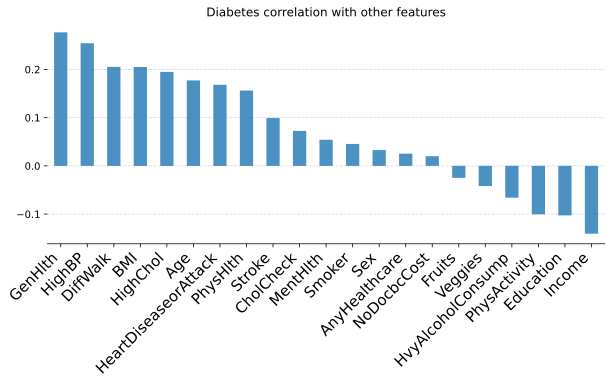

In [ ]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(10, 4), title="Diabetes correlation with other features", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

# pairwise pearson correlation

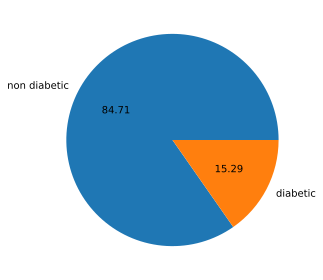

In [ ]:
plt.pie(x= df.Diabetes_binary.value_counts() , labels=['non diabetic' , 'diabetic'] , autopct='%.02f');

no. of non diabetic person > diabetic like irl but also shows imbalance

## Diabetes * major features.

In [ ]:
# Calculate the correlation of each column in df with the 'target' column

def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots

    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')

    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')

    plt.tight_layout()
    plt.show()


### feature visualisation

HighBP

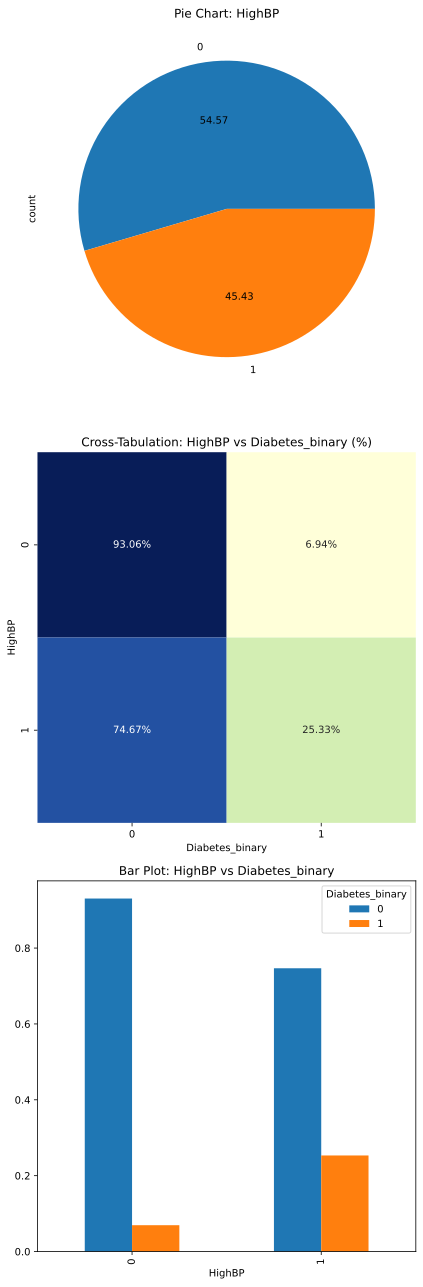

In [ ]:
visualize_feature('HighBP' , df)

people with no high blood pressure (0) are at a lower risk of developing diabetes (diabetic(1), non-diabetic (0)) than people with high blood pressure (1)

we can see the higher the bp, higher the risk of developing diabetes

HighChol

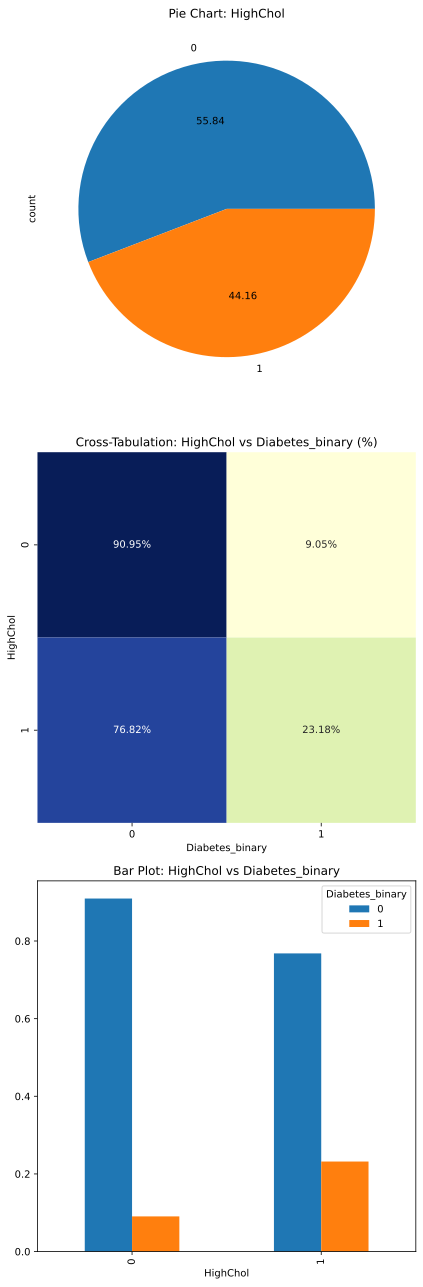

In [ ]:
visualize_feature('HighChol' ,df)

higher cholestrol lvl increases chances of developing diabetes

### HighChol * HighBP vs Diabetes
why? highchol and highbp --> hypertension; one of the leading cause for diabetes

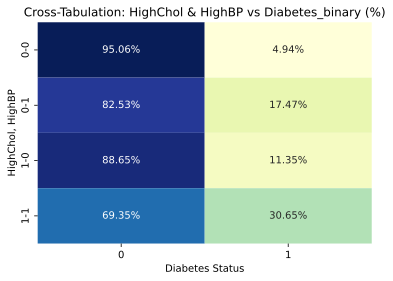

In [ ]:
cross_tab = pd.crosstab([df.HighChol, df.HighBP], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HighChol, HighBP")
plt.title("Cross-Tabulation: HighChol & HighBP vs Diabetes_binary (%)")
plt.show()


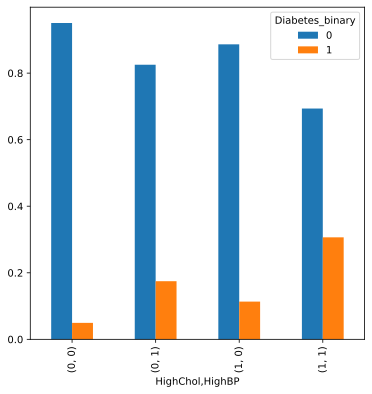

In [ ]:
cross_tab.plot(kind = 'bar' , figsize = (6,6));

we can see that with both the features present, hypertension is a major cause in developing diabetes

BMI

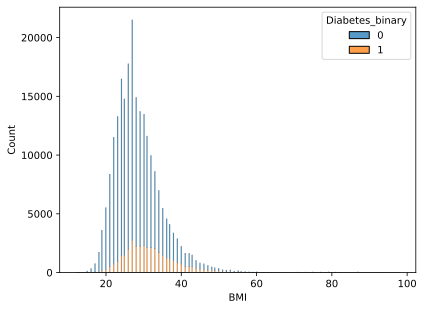

In [ ]:
sns.histplot(df , x= df.BMI,hue=df.Diabetes_binary ,multiple='stack' );

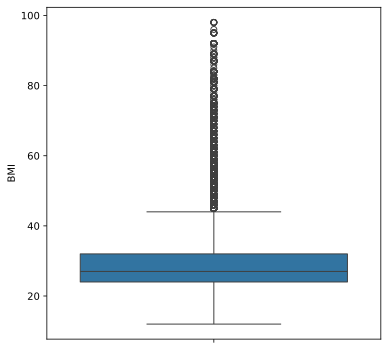

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(df.BMI);

The number of diabetes cases is highest in the BMI range of 20-50, but this is also the range with the most data points.

* This means that the relationship between BMI and diabetes is not clear-cut.

* It is possible that the higher number of diabetes cases in this range is simply due to the fact that there are more people in this range.

* However, it is also possible that there is a real relationship between BMI and diabetes in this range.

Smoker

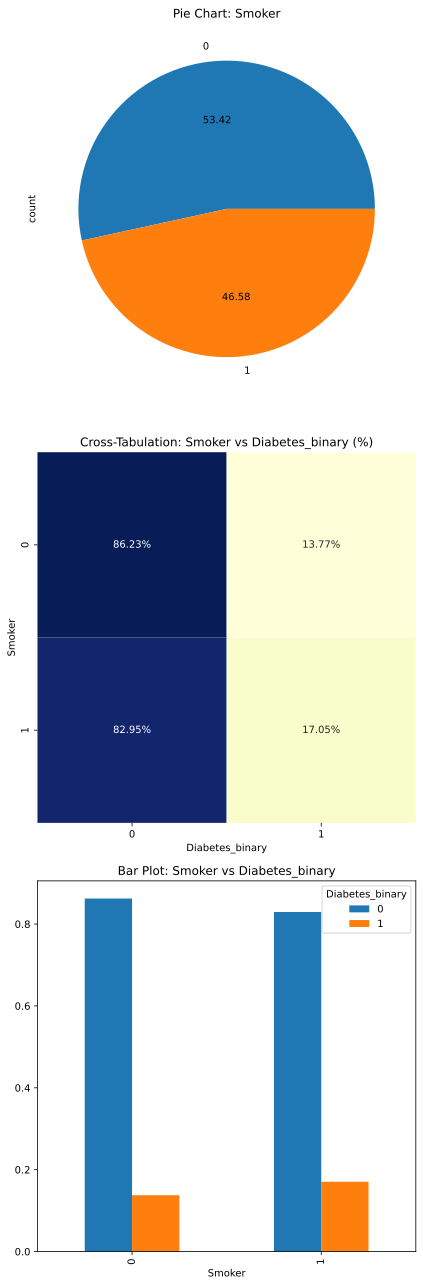

In [ ]:
visualize_feature('Smoker' , df)

no significant effect with smoking

#### Smoker * HvyAlcoholConsump vs Diabetes
why? check effect of unhealthy habits on risk of diabetes

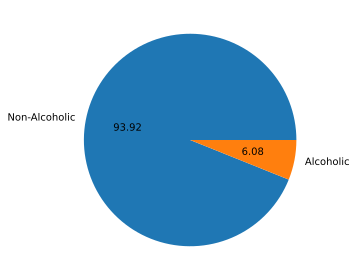

In [ ]:
plt.pie(df.HvyAlcoholConsump.value_counts() , labels = ['Non-Alcoholic' , 'Alcoholic'] , autopct='%.2f');

Data (HvyAlcoholConsump) is highly imbalance can't withdraw information from it.

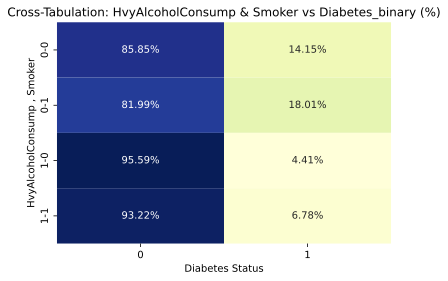

In [ ]:
cross_tab = pd.crosstab([df.HvyAlcoholConsump, df.Smoker], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HvyAlcoholConsump , Smoker")
plt.title("Cross-Tabulation: HvyAlcoholConsump & Smoker vs Diabetes_binary (%)")
plt.show()

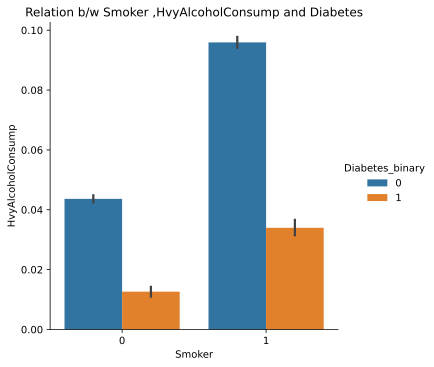

In [ ]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes");

this combo significantly increase the risk of diabetes


**MentHlth,
PhysHlth,
DiffWalk,
Stroke,
HeartDiseaseorAttack,
GenHlth**

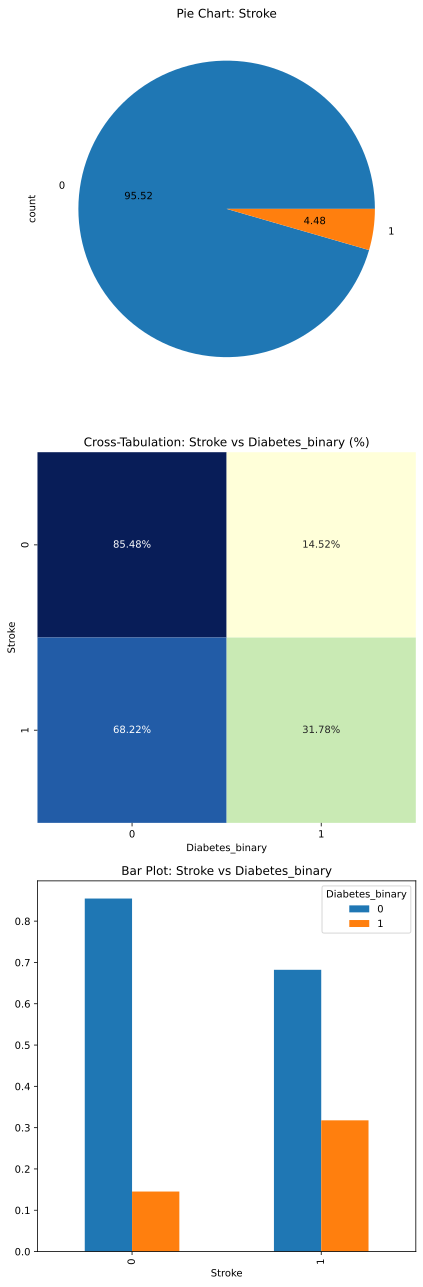

In [ ]:
visualize_feature('Stroke' , df)

people with diabetes are twice as likely to have a stroke as people without diabetes

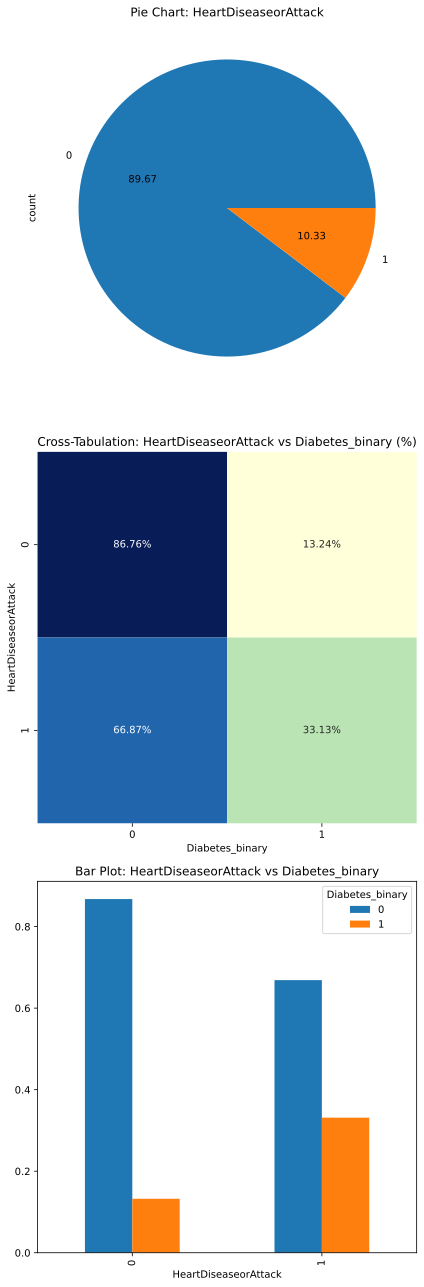

In [ ]:
visualize_feature('HeartDiseaseorAttack' , df)

history of heart attack/ stroke are more likely to develop diabetes

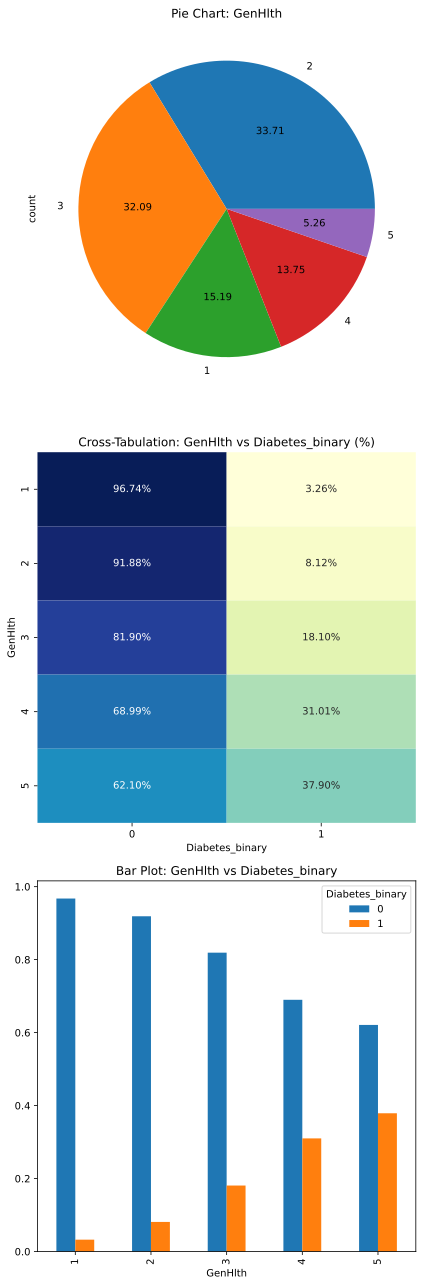

In [ ]:
visualize_feature('GenHlth' , df)

all above general factors play roles, minor and major in diabetes development

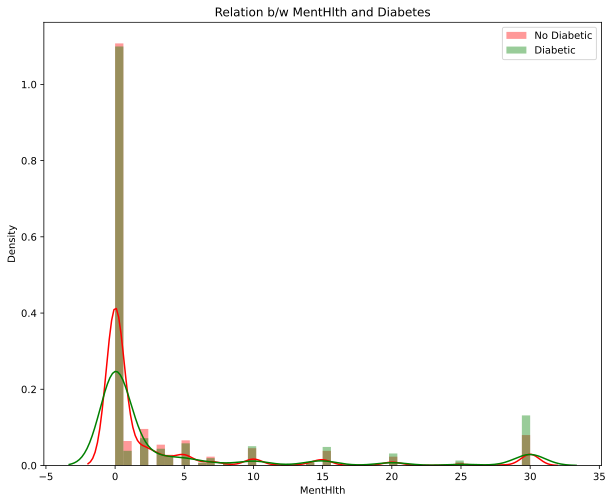

In [ ]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.MentHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.MentHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

poor mental health --> more risk

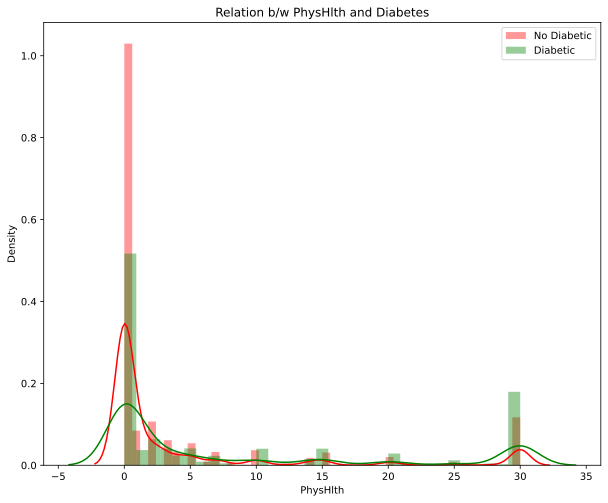

In [ ]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.PhysHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.PhysHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w PhysHlth and Diabetes")

plt.legend()

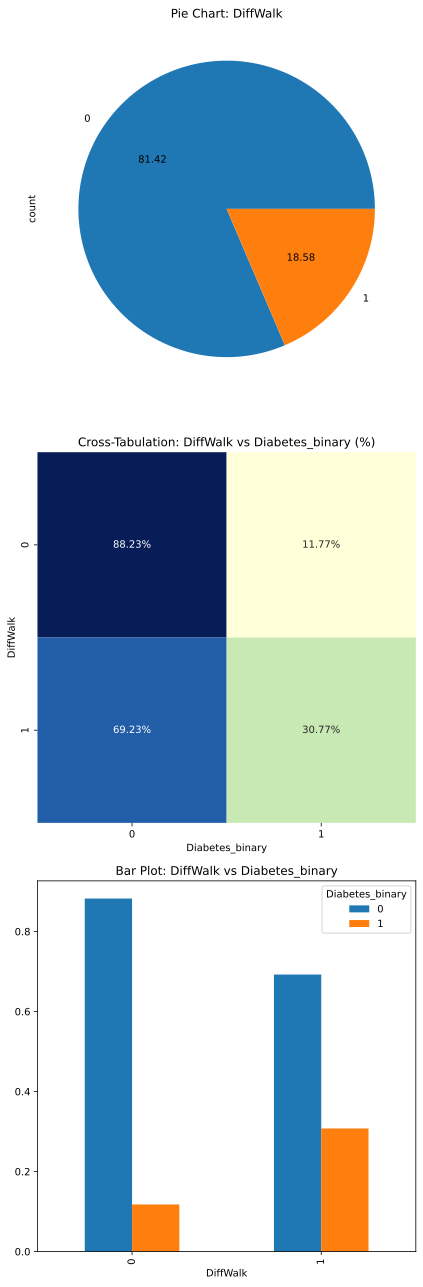

In [ ]:
visualize_feature('DiffWalk' , df)

people with diabetes have more difficulty walking


**AnyHealthcare,
NoDocbcCost**

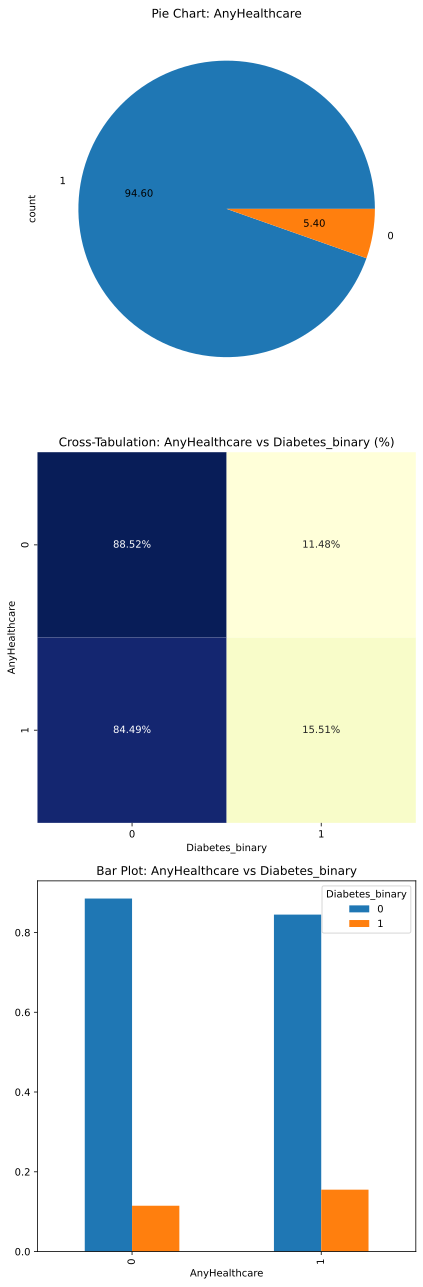

In [ ]:
visualize_feature('AnyHealthcare' , df)

In [ ]:
df.Diabetes_binary.corr(df.AnyHealthcare)

0.02533133630772532

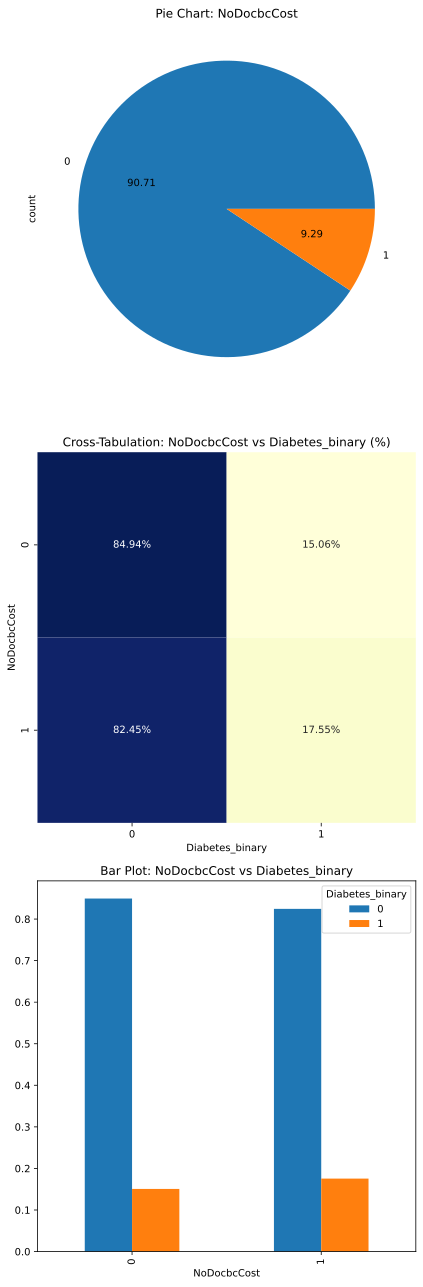

In [ ]:
visualize_feature('NoDocbcCost' , df)

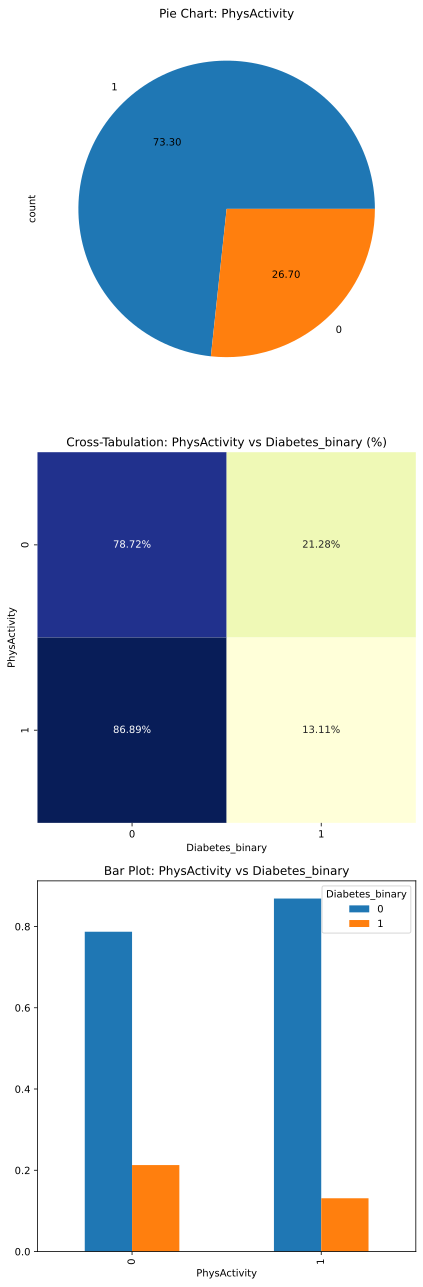

In [ ]:
visualize_feature('PhysActivity' , df)

regular physical activity related with less chances of diabetes

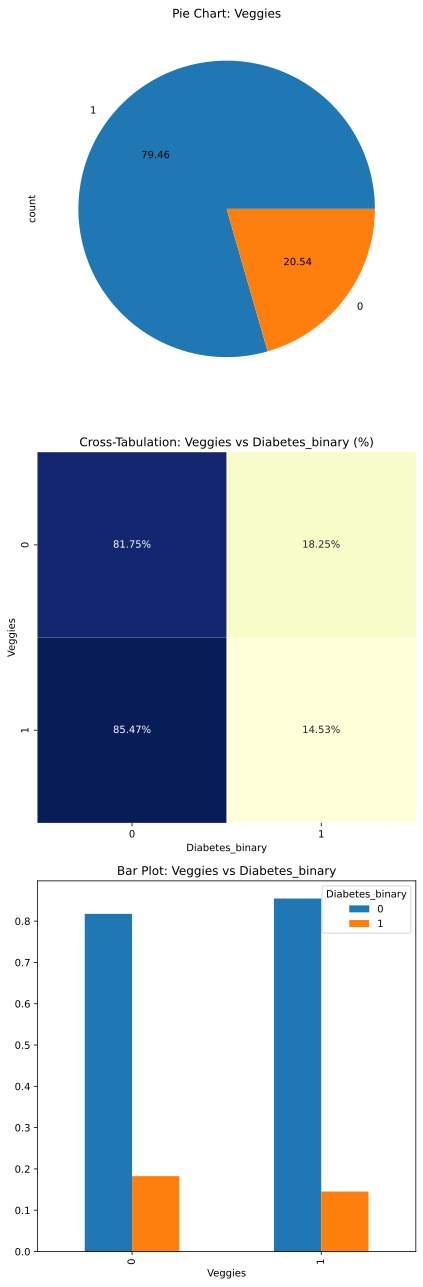

In [ ]:
visualize_feature('Veggies' , df)

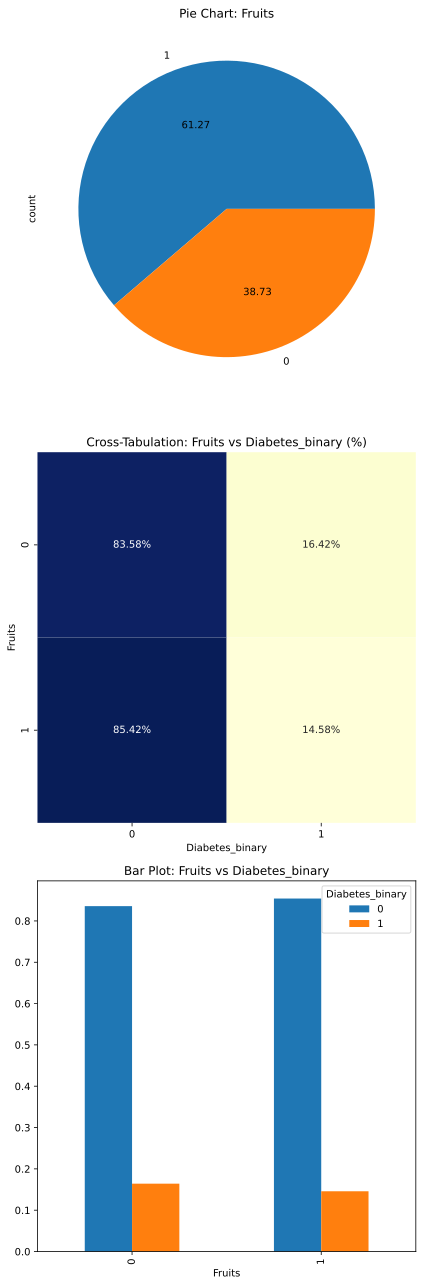

In [ ]:
visualize_feature('Fruits' , df)

**Age ,
Sex ,
Education ,
Income**

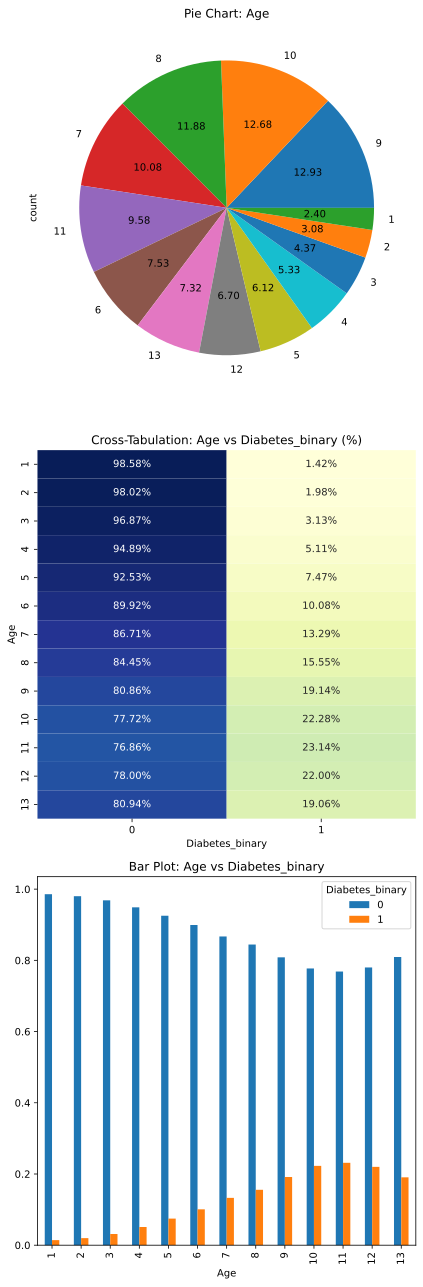

In [ ]:
visualize_feature('Age' , df)

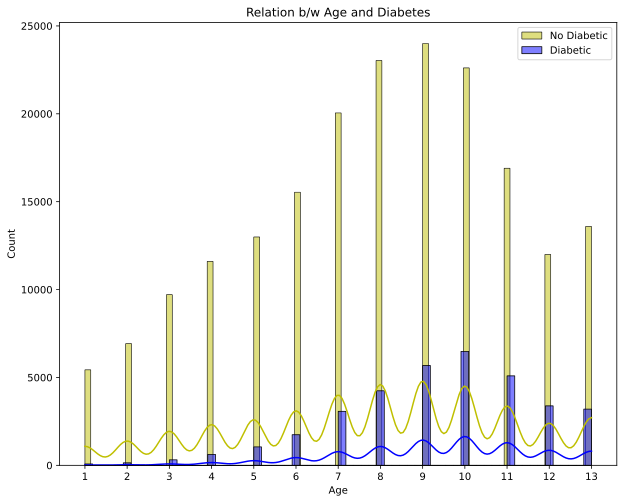

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df.Age[df.Diabetes_binary == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(df.Age[df.Diabetes_binary == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(df["Age"].unique())
plt.legend()

increase risk of diabetes with age

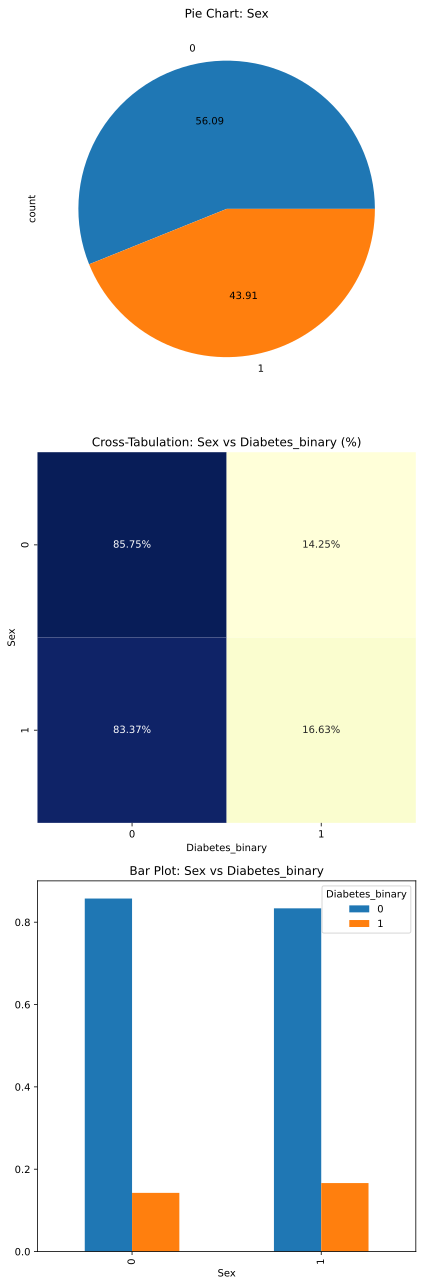

In [ ]:
visualize_feature('Sex', df)

male and female have same chances of developing diabetes (according to the dataset)

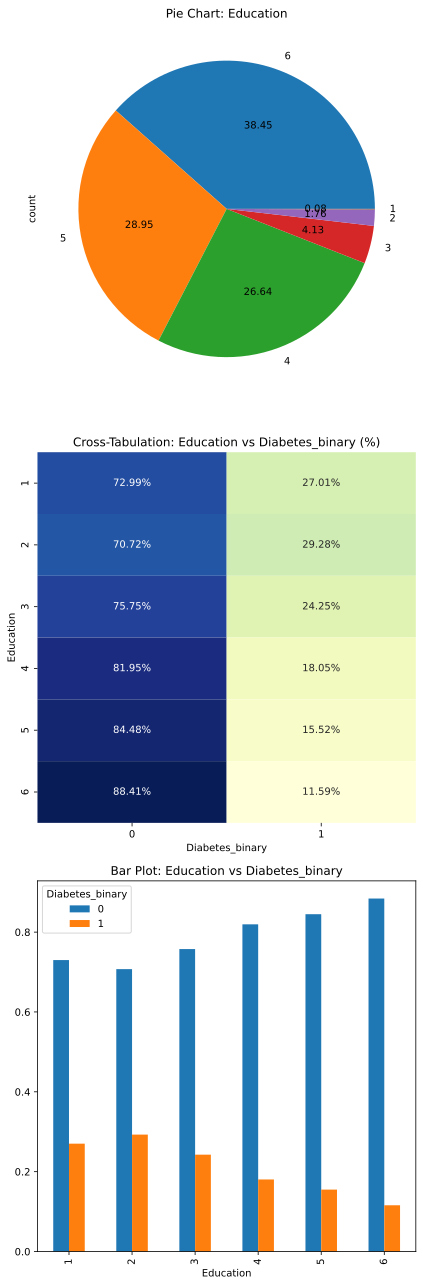

In [ ]:
visualize_feature('Education' , df)

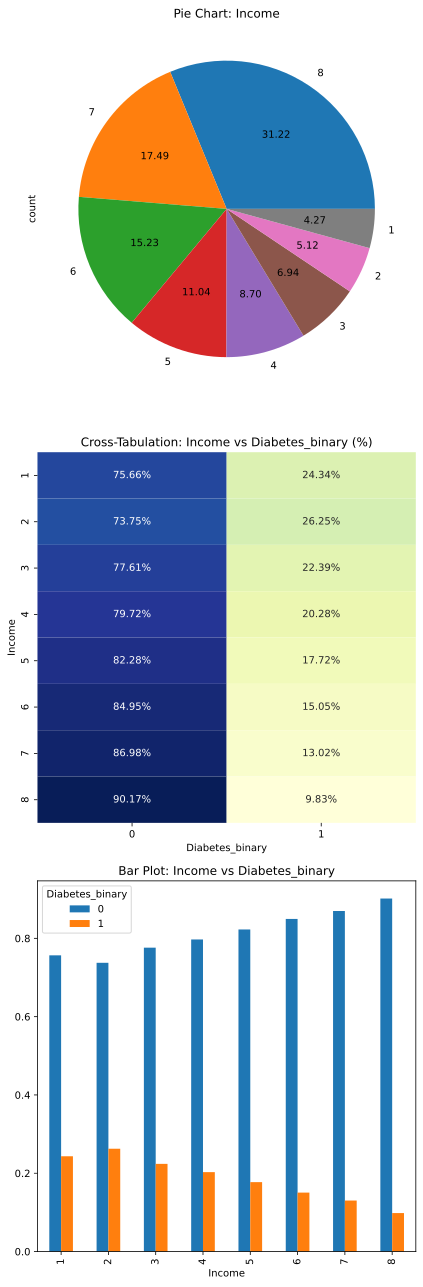

In [ ]:
visualize_feature('Income' ,df)

age >= 45 are more vulnerable for diabetes

people with lower income > risk of diabetes. could be due to poor health insurance and not being able to afford health checkups